# Compare energy requirements and resulting GWPs for different types of air separation units

In [19]:
from config import settings
import numpy as np
import matplotlib.pyplot as plt
from configs import gaussian
from functions.MC import make_dist


In [9]:
# Method 1: Gabi Data

emissions_1 = settings.data.CO2_equivalents.resource_requirements.oxygen
equivalent_electricity_req_1 = emissions_1 / (1 / settings.data.densities["O2"]) / settings.data.CO2_equivalents.electricity.UK
print("Emissions from Method 1:", emissions_1, "kg CO2eq./kg O2")
print("Corresponding electricity consumption:", equivalent_electricity_req_1, "[kWh/ Nm3 O2]")


Emissions from Method 1: 0.0913 kg CO2eq./kg O2
Corresponding electricity consumption: 0.5688781613526116 [kWh/ Nm3 O2]


In [4]:
# Method 2: Data from Masaaki et al.

emissions_2_low = settings.data.energy_requirements.air_separation_unit.A["energy consumption low"] * (1 / settings.data.densities["O2"]) * settings.data.CO2_equivalents.electricity.UK

emissions_2_high = settings.data.energy_requirements.air_separation_unit.A["energy consumption high"] * (1 / settings.data.densities.O2) * settings.data.CO2_equivalents.electricity.UK

print("Lower emissions from Method 2:", emissions_2_low, "kg CO2eq./kg O2")
print("Higher emissions from Method 2:", emissions_2_high, "kg CO2eq./kg O2")


Lower emissions from Method 2: 0.05777687074829932 kg CO2eq./kg O2
Higher emissions from Method 2: 0.08024565381708239 kg CO2eq./kg O2


In [10]:
# Method 3: Data from "https://doi.org/10.1002/apj.354"

assumed_time_req = 1  # assume that ASU would need to run for 1 hr - nothing given in paper - bit weird that they quote it as power per tonne of O2 instead of energy per tonne of O2.
emissions_3 = (settings.data.power_requirements.air_separation_unit["power consumption"] / 1000) * assumed_time_req * settings.data.CO2_equivalents.electricity.UK

equivalent_electricity_req_3 = emissions_3 / (1 / settings.data.densities["O2"]) / settings.data.CO2_equivalents.electricity.UK

print("Emissions from Method 3:", emissions_3, "kg CO2eq./kg O2")
print("Corresponding electricity consumption:", equivalent_electricity_req_3, "[kWh/ Nm3 O2]")


Emissions from Method 3: 0.04777425 kg CO2eq./kg O2
Corresponding electricity consumption: 0.29767499999999997 [kWh/ Nm3 O2]


In [6]:
# Method 4: Data from Ozcan et al.

emissions_4 = settings.data.energy_requirements.air_separation_unit.B["energy consumption"] * (1 / settings.data.densities["O2"]) * settings.data.CO2_equivalents.electricity.UK

print("Emissions from Method 4:", emissions_4, "kg CO2eq./kg O2")


Emissions from Method 4: 0.049046143613000755 kg CO2eq./kg O2


In [13]:
# Corresponding electricity requirements for oxygen generation

print("Corresponding electricity requirements for oxygen generation [kWh el./Nm3 O2]")
print("Req 1:", equivalent_electricity_req_1)
print("Req 2 low:", settings.data.energy_requirements.air_separation_unit.A["energy consumption low"])
print("Req 2 high:", settings.data.energy_requirements.air_separation_unit.A["energy consumption high"])
print("Req 3:", equivalent_electricity_req_3)
print("Req 4:", settings.data.energy_requirements.air_separation_unit.B["energy consumption"])


Corresponding electricity requirements for oxygen generation [kWh el./Nm3 O2]
Req 1: 0.5688781613526116
Req 2 low: 0.36
Req 2 high: 0.5
Req 3: 0.29767499999999997
Req 4: 0.3056


In [28]:
# Statistical analysis

# store data displayed above as array
data = [equivalent_electricity_req_1, settings.data.energy_requirements.air_separation_unit.A["energy consumption low"],settings.data.energy_requirements.air_separation_unit.A["energy consumption high"], equivalent_electricity_req_3, settings.data.energy_requirements.air_separation_unit.B["energy consumption"]]

mean = np.mean(data)
std = np.std(data)

distribution = make_dist(gaussian(mean, std))

print("Data:", data)
print("Mean:", mean)
print("Std:", std)

Data: [0.5688781613526116, 0.36, 0.5, 0.29767499999999997, 0.3056]
Mean: 0.4064306322705223
Std: 0.10889888323563775


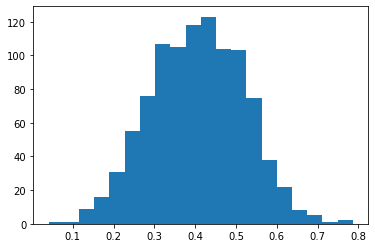

In [27]:
# Show distribution

plt.figure()
histogram = plt.hist(distribution,20)
plt.show()

# Summary
- All methods produce similar numbers and are in the same order of magnitude.
- Numbers from GaBi are most pessimistic - close to the lower efficiency of Method 2.
- Most conservative values (Method 1) are used in analysis.